# Import Libraries 📕

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
df_path = '/kaggle/input/lifestyle-and-sleep-patterns/Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(df_path)

# Get Some Information 👁️

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [5]:
shape = df.shape
print('The number of column : ',shape[1])
print('The number of ligne : ',shape[0])

The number of column :  13
The number of ligne :  374


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [8]:
print('columns:')
for num,col in enumerate(df.columns,1) :
    print(f'{num})- {col}')

columns:
1)- Person ID
2)- Gender
3)- Age
4)- Occupation
5)- Sleep Duration
6)- Quality of Sleep
7)- Physical Activity Level
8)- Stress Level
9)- BMI Category
10)- Blood Pressure
11)- Heart Rate
12)- Daily Steps
13)- Sleep Disorder


In [9]:
print('Numerate columns :')
num_col = df.select_dtypes(include=np.number).columns
for num,col in enumerate(num_col,1):
    print(f'{num})- {col}')

Numerate columns :
1)- Person ID
2)- Age
3)- Sleep Duration
4)- Quality of Sleep
5)- Physical Activity Level
6)- Stress Level
7)- Heart Rate
8)- Daily Steps


In [10]:
print('Object columns :')
obj_col = df.select_dtypes(include='object').columns
for num,col in enumerate(obj_col,1):
    print(f'{num})- {col}')

Object columns :
1)- Gender
2)- Occupation
3)- BMI Category
4)- Blood Pressure
5)- Sleep Disorder


# Data Cleaning

In [11]:
for column in df.columns :
    if df[column].dtypes in [np.int64,np.float64] :
        df[column]=df[column].fillna(0)
    elif df[column].dtypes =='object':
        df[column]=df[column].fillna('Unknown')
print(df.isnull().sum())
print('\nDataFrame is cleaning')

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

DataFrame is cleaning


In [12]:
df.duplicated().sum()

0

# Data Manipulation

In [13]:
# display available occupation
occup = df['Occupation'].unique()
print('Occupation : ')
for num,x in enumerate(occup,1) :
    print(f'{num})- {x}')

Occupation : 
1)- Software Engineer
2)- Doctor
3)- Sales Representative
4)- Teacher
5)- Nurse
6)- Engineer
7)- Accountant
8)- Scientist
9)- Lawyer
10)- Salesperson
11)- Manager


In [14]:
# display BMI cat
bmi = df['BMI Category'].unique()
print('BMI Category: ')
for num,cat in enumerate(bmi,1) :
    print(f'{num})- {cat}')

BMI Category: 
1)- Overweight
2)- Normal
3)- Obese
4)- Normal Weight


In [15]:
# display Sleep Disorder
Sleep_D = df['Sleep Disorder'].unique()
print('Sleep Disorder: ')
for num,sleep in enumerate(Sleep_D,1) :
    print(f'{num})- {sleep}')

Sleep Disorder: 
1)- Unknown
2)- Sleep Apnea
3)- Insomnia


In [16]:
# display the most Sleep Disorder
msd_id=df.groupby('Sleep Disorder').size().idxmax()
msd_max=df.groupby('Sleep Disorder').size().max()
msd_id2=df.groupby('Sleep Disorder').size().idxmin()
msd_min=df.groupby('Sleep Disorder').size().min()
print('The most Sleep Disorder is :',msd_id,'with',msd_max)
print('\nThe low Sleep Disorder is :',msd_id2,'with',msd_min)

The most Sleep Disorder is : Unknown with 219

The low Sleep Disorder is : Insomnia with 77


In [17]:
str_max=df.loc[df['Stress Level'].idxmax(),'Occupation']
maxi = df['Stress Level'].max()
str_min=df.loc[df['Stress Level'].idxmin(),'Occupation']
mini = df['Stress Level'].min()
print('The occupation with high stress level is :',str_max,'with stress level:',maxi)
print('\nThe occupation with low stress level is :',str_min,'with stress level:',mini)

The occupation with high stress level is : Doctor with stress level: 8

The occupation with low stress level is : Engineer with stress level: 3


In [18]:
# show the occupation with high and low sleep duration
Sleep_Dur_id = df.loc[df['Sleep Duration'].idxmax(),'Occupation']
Sleep_Dur_max = df['Sleep Duration'].max()

Sleep_Dur_id2 = df.loc[df['Sleep Duration'].idxmin(),'Occupation']
Sleep_Dur_min = df['Sleep Duration'].min()

print('The occupation with high sleep duration is:',Sleep_Dur_id,'with ',Sleep_Dur_max)
print('\nThe occupation with low sleep duration is:',Sleep_Dur_id2,'with ',Sleep_Dur_min)

The occupation with high sleep duration is: Engineer with  8.5

The occupation with low sleep duration is: Scientist with  5.8


In [19]:
# show the occupation with high and low Quality of Sleep
Sleep_qua_id= df.loc[df['Quality of Sleep'].idxmax(),'Occupation']
Sleep_qua_max= df['Quality of Sleep'].max()

Sleep_qua_id2= df.loc[df['Quality of Sleep'].idxmin(),'Occupation']
Sleep_qua_min= df['Quality of Sleep'].min()

print('The occupation with high Quality of Sleep is:',Sleep_qua_id,'with',Sleep_qua_max)
print('\nThe occupation with low Quality of Sleep is:',Sleep_qua_id2,'with',Sleep_qua_min)

The occupation with high Quality of Sleep is: Accountant with 9

The occupation with low Quality of Sleep is: Sales Representative with 4


In [20]:
# show the occupation with high and low Physical Activity Level
Physique_id = df.loc[df['Physical Activity Level'].idxmax(),'Occupation']
Physique_max = df['Physical Activity Level'].max()

Physique_id2 = df.loc[df['Physical Activity Level'].idxmin(),'Occupation']
Physique_min = df['Physical Activity Level'].min()

print('The occupation with high Physical Activity Level is:',Physique_id,'with',Physique_max)
print('\nThe occupation with low Physical Activity Level is:',Physique_id2,'with',Physique_min)

The occupation with high Physical Activity Level is: Lawyer with 90

The occupation with low Physical Activity Level is: Sales Representative with 30


In [21]:
# show the occupation with high and low Heart Rate
Heart_id = df.loc[df['Heart Rate'].idxmax(),'Occupation']
Heart_max = df['Heart Rate'].max()

Heart_id2 = df.loc[df['Heart Rate'].idxmin(),'Occupation']
Heart_min = df['Heart Rate'].min()

print('The occupation with high Heart Rate is:',Heart_id,'with',Heart_max)
print('\nThe occupation with low Heart Rate is:',Heart_id2,'with',Heart_min)

The occupation with high Heart Rate is: Doctor with 86

The occupation with low Heart Rate is: Engineer with 65


In [22]:
# Sleep Disorder of Occupation
df2= df.pivot_table(index='Occupation',columns='Sleep Disorder',values='Person ID',aggfunc='count')
df2 = df2.fillna(0)
df2= df2.astype('int')
df2

Sleep Disorder,Insomnia,Sleep Apnea,Unknown
Occupation,,,
Accountant,7,0,30
Doctor,3,4,64
Engineer,5,1,57
Lawyer,2,3,42
Manager,0,0,1
Nurse,3,61,9
Sales Representative,0,2,0
Salesperson,29,1,2
Scientist,0,2,2


In [23]:
# show the occupation of male and female
df3 = df.pivot_table(index='Occupation',columns='Gender',values='Person ID',aggfunc='count')
df3 = df3.fillna(0)
df3 = df3.astype('int')
total=df3.sum()
df3.loc['Total']=total
df3

Gender,Female,Male
Occupation,,
Accountant,36,1
Doctor,2,69
Engineer,32,31
Lawyer,2,45
Manager,1,0
Nurse,73,0
Sales Representative,0,2
Salesperson,0,32
Scientist,4,0


In [24]:
# show The Manager
df.loc[df['Occupation']=='Manager']

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
263,264,Female,45,Manager,6.9,7,55,5,Overweight,125/82,75,5500,Unknown


In [25]:
# show The Female Doctor
df.loc[(df['Occupation']=='Doctor')&(df['Gender']=='Female'),:]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
341,342,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,Unknown
342,343,Female,56,Doctor,8.2,9,90,3,Normal Weight,118/75,65,10000,Unknown


# Explorarory Data Analysis 📊

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


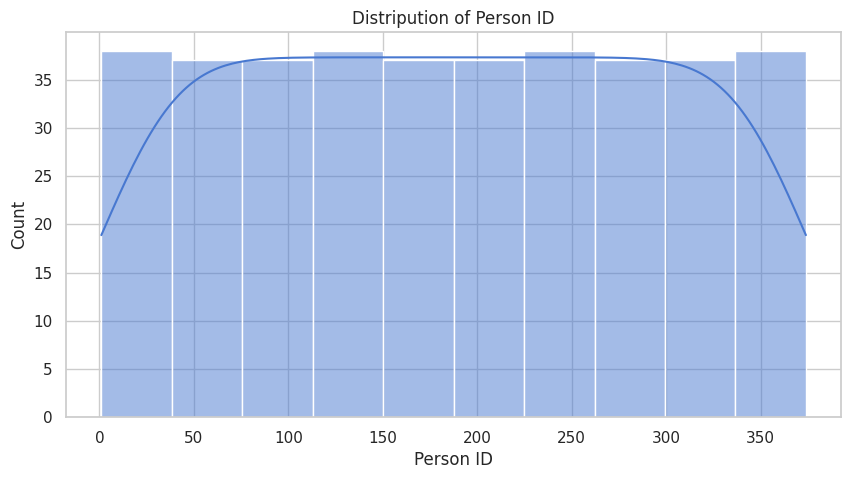

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


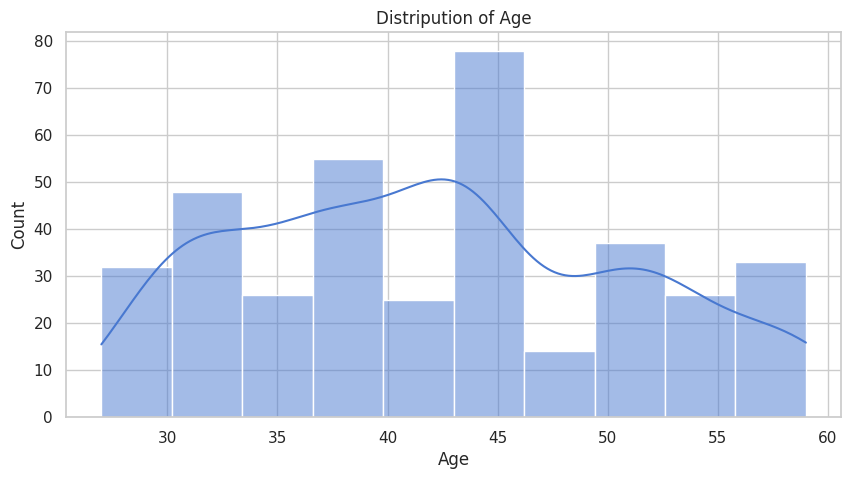

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


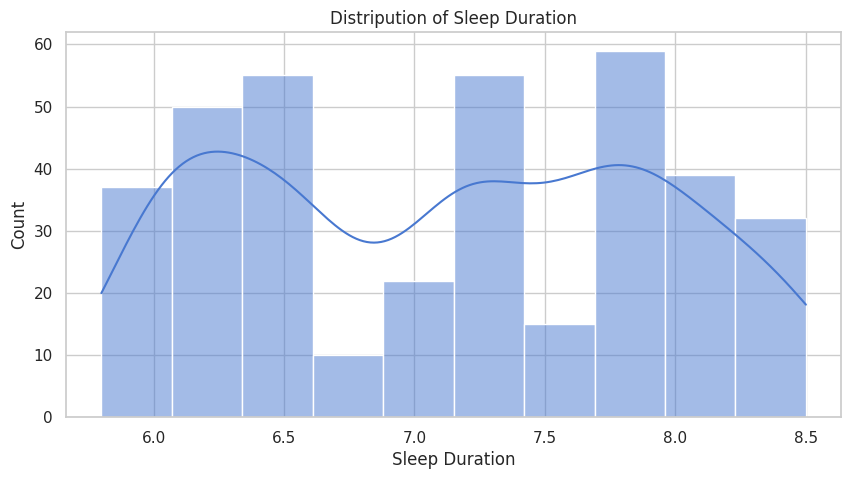

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


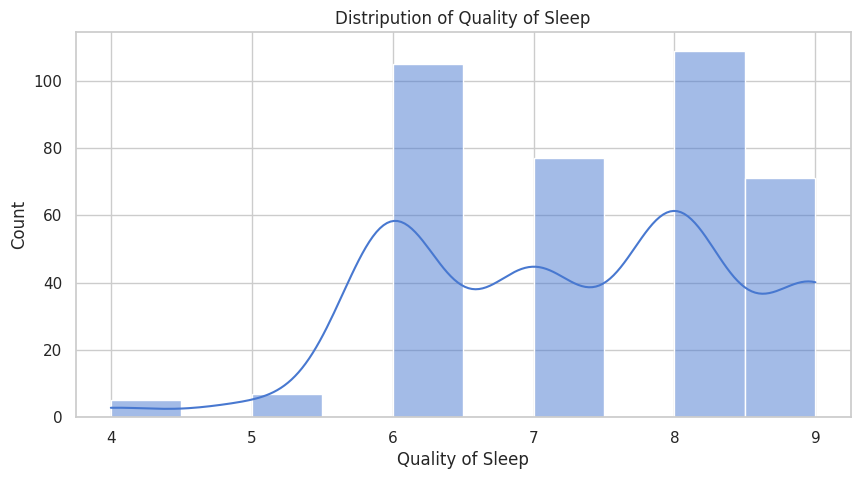

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


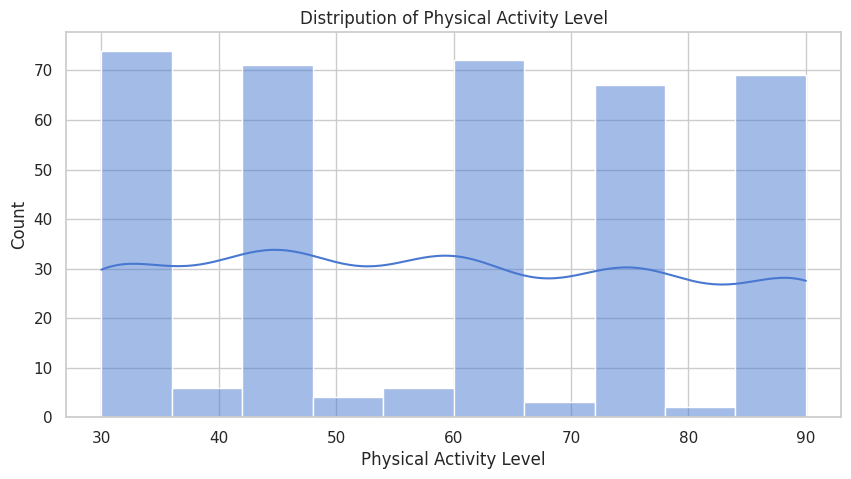

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


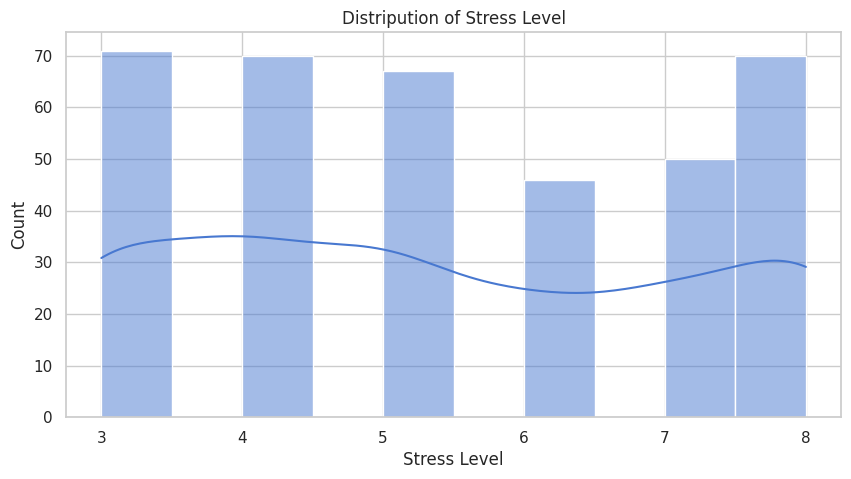

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


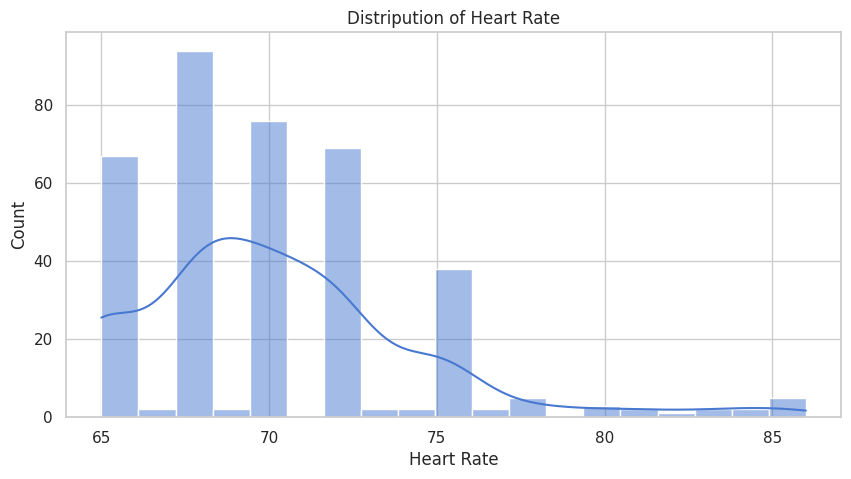

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


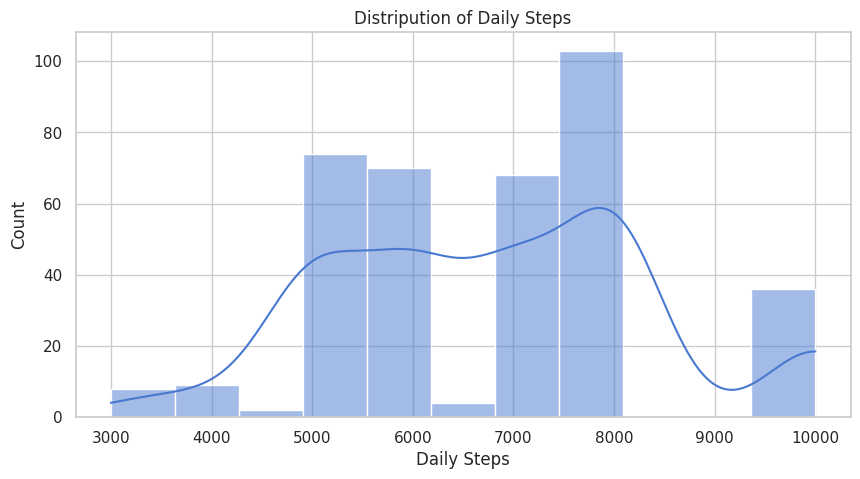

In [26]:
sns.set(style='whitegrid', palette='muted', color_codes=True)
for col in num_col :
    plt.figure(figsize=(10,5))
    plt.title(f'Distripution of {col}')
    sns.histplot(data=df,x=col,kde=True)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


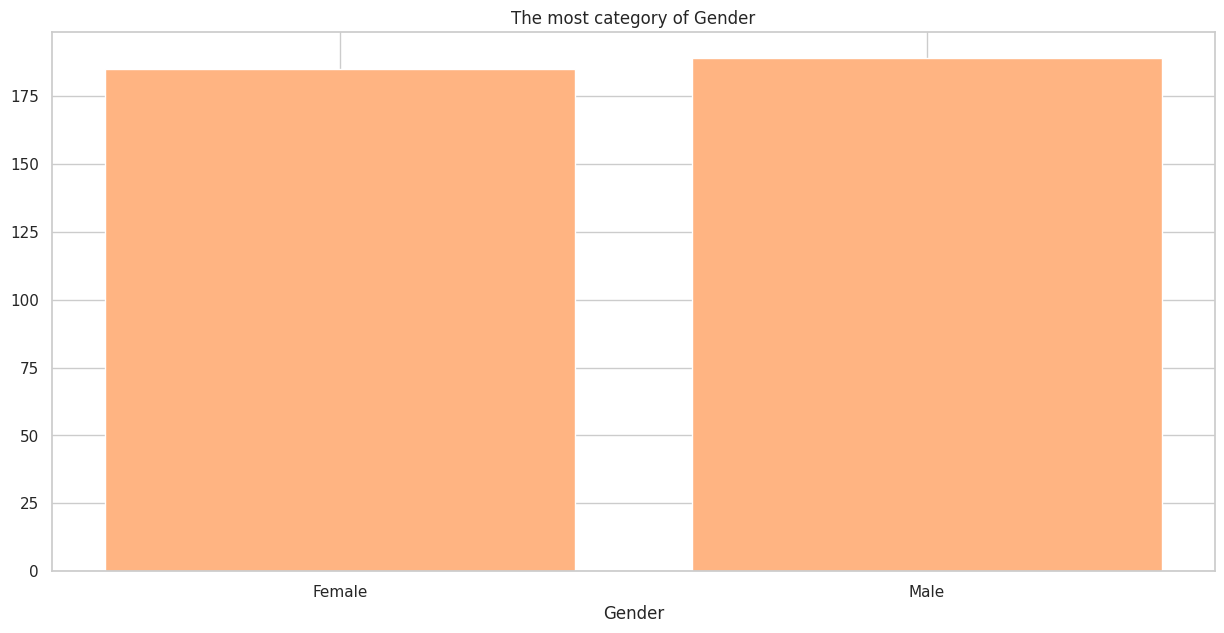

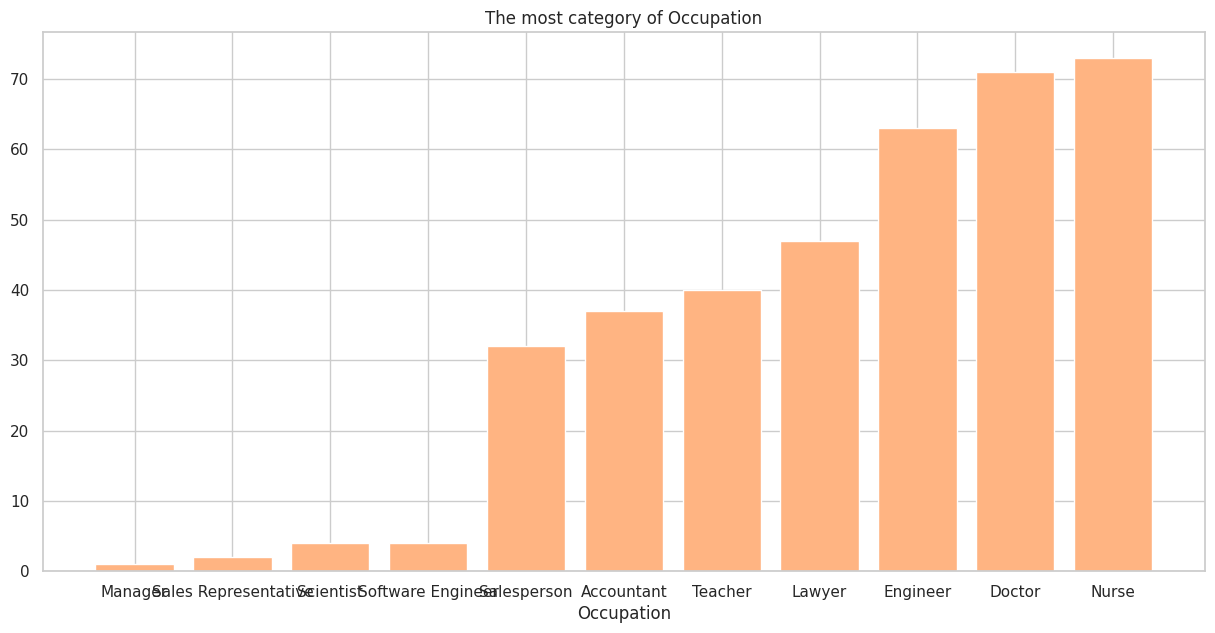

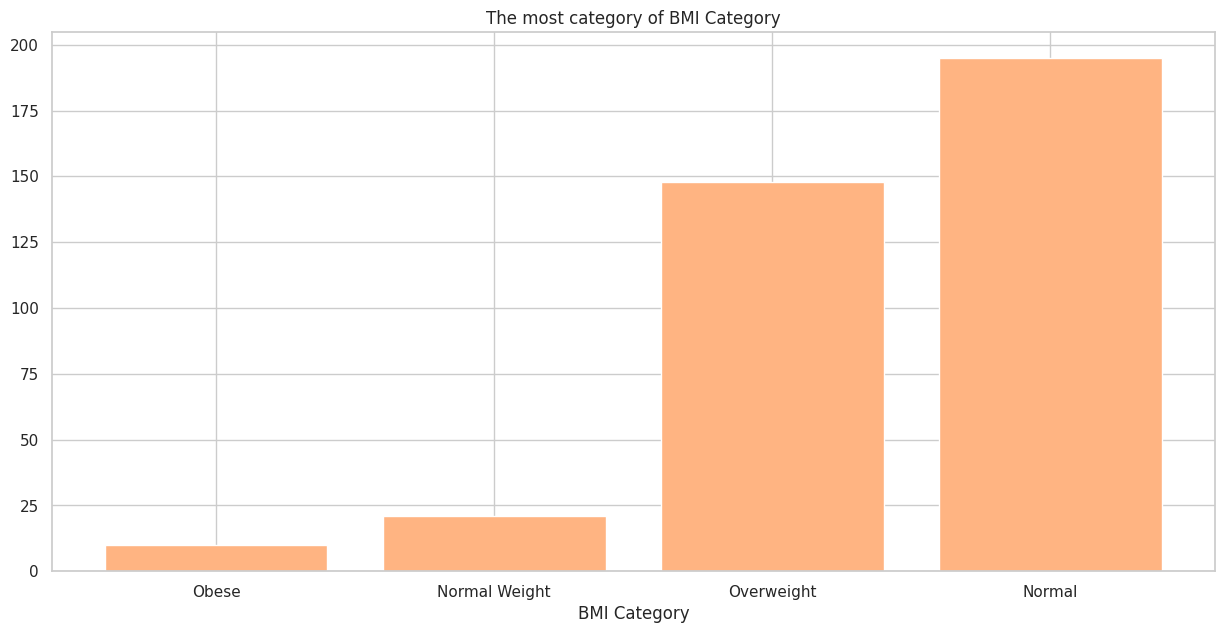

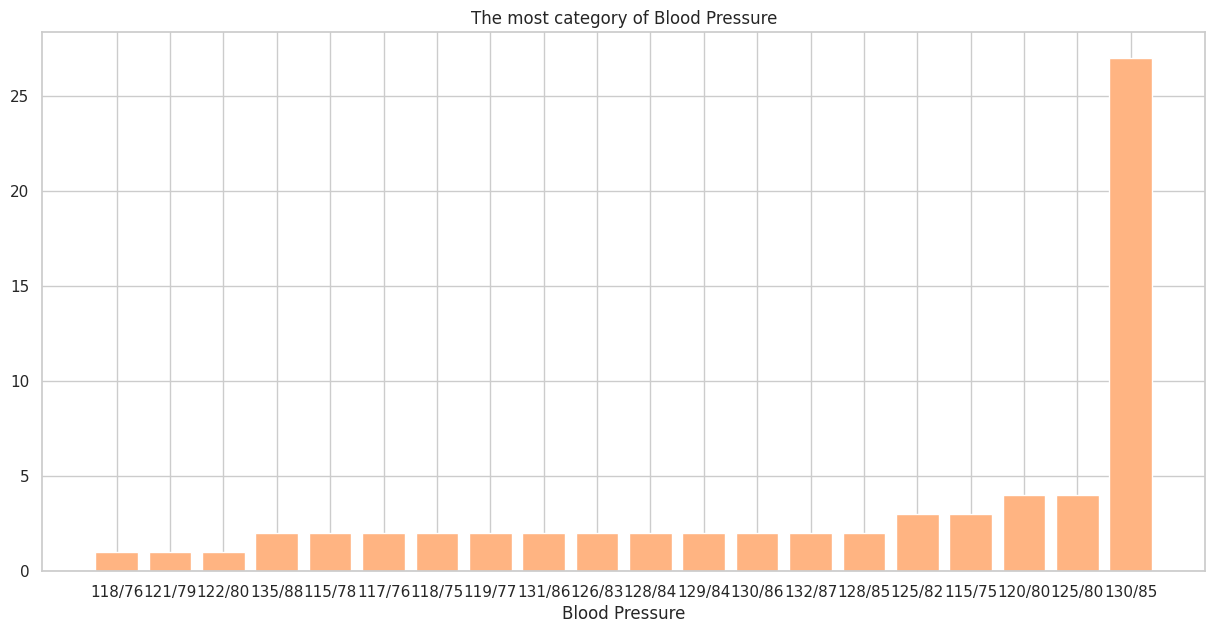

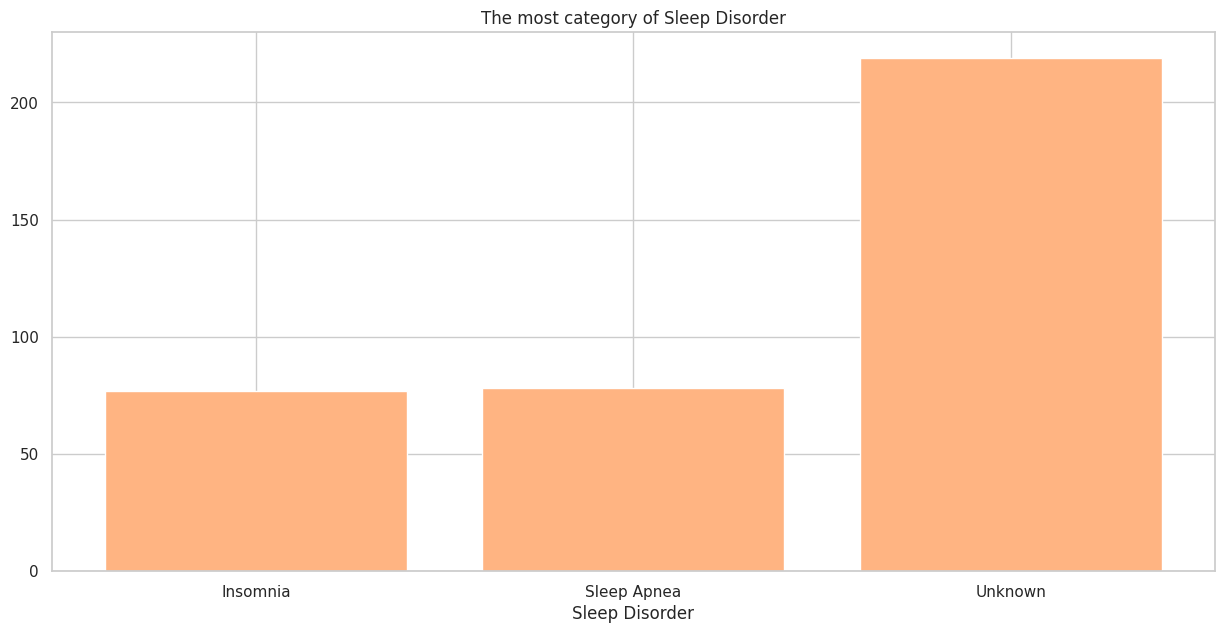

In [27]:
for col in obj_col :
    plt.figure(figsize=(15,7))
    plt.title(f'The most category of {col}')
    plt.bar(df.groupby(col).size().head(20).sort_values().index,df.groupby(col).size().sort_values().head(20),color='#FFB482')
    plt.xlabel(col)

<Axes: title={'center': 'the occupation of male and female'}, xlabel='Occupation', ylabel='count'>

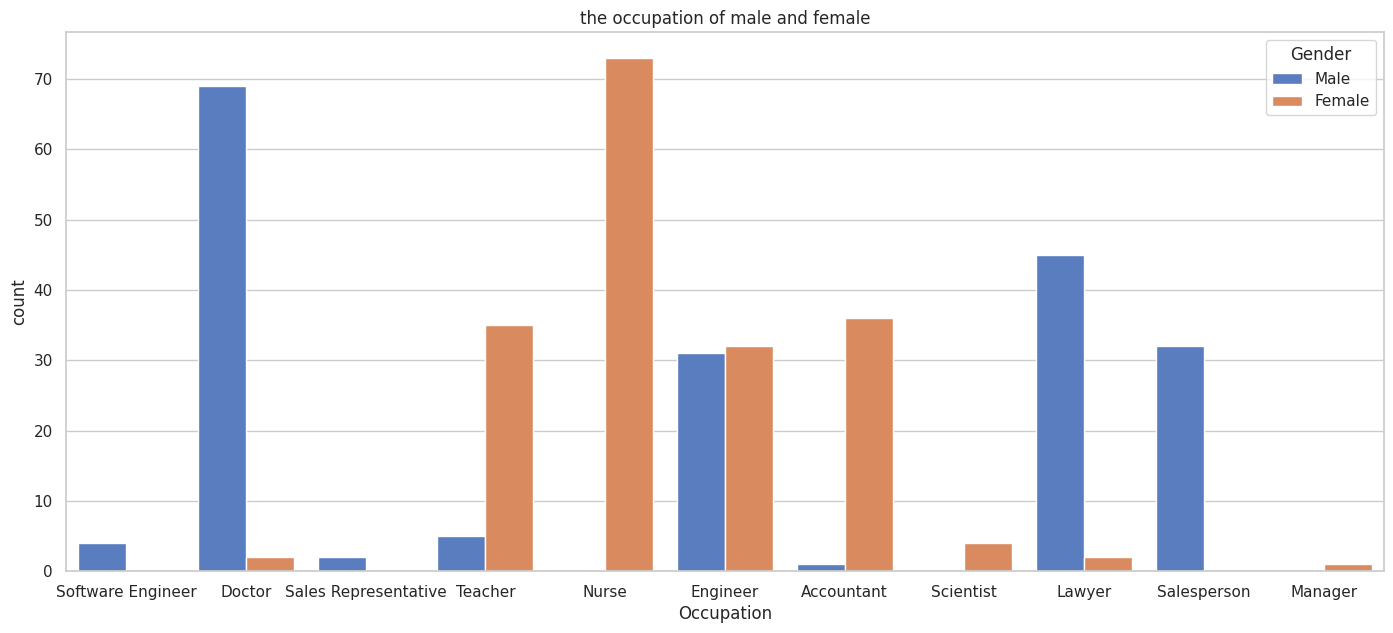

In [28]:
plt.figure(figsize=(17,7))
plt.title('the occupation of male and female')
sns.countplot(data=df,x='Occupation',hue='Gender')

<Axes: xlabel='Sleep Duration', ylabel='Quality of Sleep'>

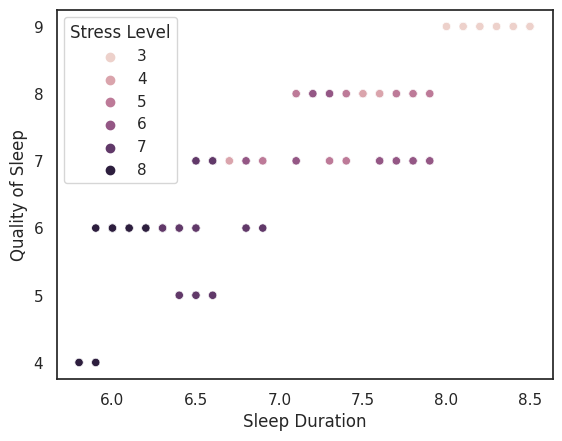

In [29]:
plt.figure()
sns.set_style('white')
sns.scatterplot(data=df,x='Sleep Duration',y='Quality of Sleep',hue='Stress Level')

<Axes: xlabel='Sleep Duration', ylabel='Quality of Sleep'>

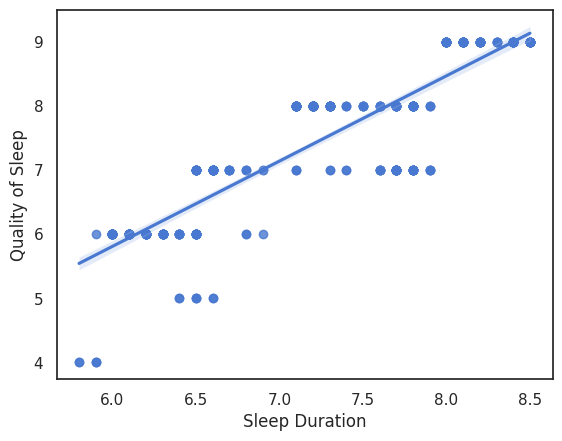

In [30]:
sns.regplot(data=df,x='Sleep Duration',y='Quality of Sleep')

<Axes: xlabel='Physical Activity Level', ylabel='Quality of Sleep'>

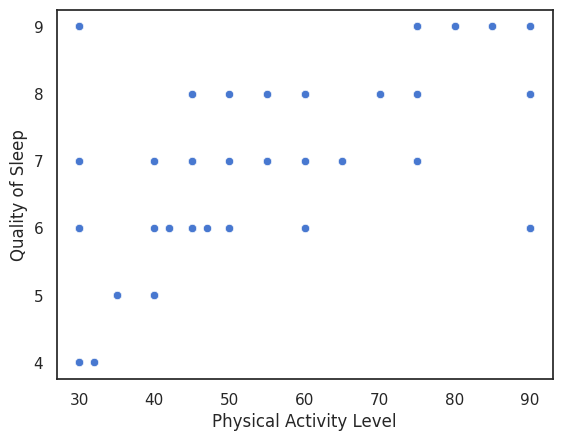

In [31]:
sns.scatterplot(data=df,x='Physical Activity Level',y='Quality of Sleep')

# Data Correlation

<Axes: >

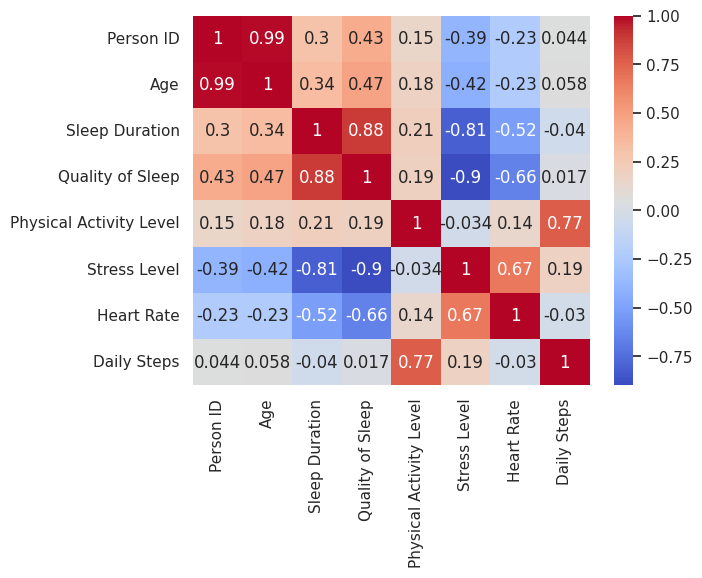

In [32]:
df_num = df[num_col]
sns.heatmap(df_num.corr(),annot=True,cmap='coolwarm')

# Finally

**If you found this notebook useful, don't forget to upvote it. 😊**